In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [3]:
#load the dataset
file =pd.read_csv(r'C:\Users\Sonal\WRIST.csv')

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315000 entries, 0 to 314999
Data columns (total 12 columns):
sno              315000 non-null int64
Ax               315000 non-null float64
Ay               315000 non-null float64
Az               315000 non-null float64
Gx               315000 non-null float64
Gy               315000 non-null float64
Gz               315000 non-null float64
Mx               315000 non-null float64
My               315000 non-null float64
Mz               315000 non-null float64
Activitylabel    315000 non-null object
USERID           315000 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 28.8+ MB


# data preprocessing and feature extraction

In [5]:
#missing value

file.isnull().sum()

sno              0
Ax               0
Ay               0
Az               0
Gx               0
Gy               0
Gz               0
Mx               0
My               0
Mz               0
Activitylabel    0
USERID           0
dtype: int64

In [8]:
df = file
df['A'] = ( df['Ax']**2 + df['Ay']**2 + df['Az']**2 ) **0.5
df['G'] = ( df['Gx']**2 + df['Gy']**2 + df['Gz']**2 ) **0.5
df['M'] = ( df['Mx']**2 + df['My']**2 + df['Mz']**2 ) **0.5

df

,sno,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz,Activitylabel,USERID,A,G,M
0,0,4.7944,-10.7330,-2.38360,-0.58887,-1.109900,-0.578180,10.38,32.70,22.68,walking,U1,11.994378,1.383090,41.126838
1,1,4.7807,-11.4680,-2.79220,-0.58735,-1.789800,-1.061400,11.04,32.88,22.38,walking,U1,12.734461,2.162160,41.277602
2,2,5.2302,-13.2530,-3.02370,-0.75472,-2.305700,-1.218700,11.34,33.00,22.20,walking,U1,14.565018,2.714974,41.357413
3,3,5.1894,-13.6610,-2.88750,-0.93554,-2.730600,-1.248600,11.46,33.06,22.20,walking,U1,14.895988,3.144903,41.438330
4,4,4.7944,-14.0830,-2.50610,-1.03820,-2.820100,-1.221700,11.64,33.12,22.20,walking,U1,15.086341,3.243975,41.536297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314995,314995,4.9033,-10.0650,-1.02150,0.27367,0.701880,0.212580,-12.66,32.52,2.34,downstairs,U5,11.242332,0.782765,34.975729
314996,314996,4.9169,-9.9429,-1.11690,0.38454,0.541230,0.055894,-12.06,32.82,2.04,downstairs,U5,11.148302,0.666277,35.025100
314997,314997,4.5220,-9.4389,-1.08960,0.55375,0.317650,-0.202810,-10.74,33.48,1.14,downstairs,U5,10.522763,0.669830,35.178937
314998,314998,4.3858,-9.4525,-1.11690,0.63102,0.158820,-0.386370,-10.14,33.78,0.72,downstairs,U5,10.480098,0.756764,35.276428


In [6]:
scaled_X = df

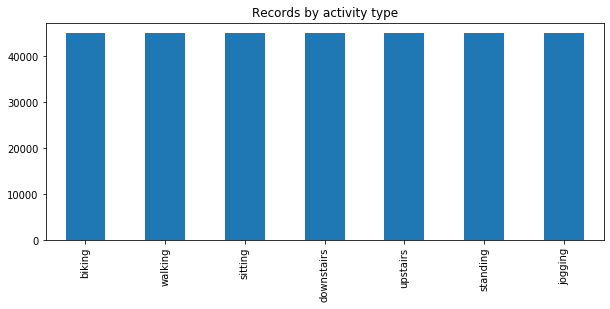

In [7]:
scaled_X['Activitylabel'].value_counts().plot(kind='bar', title='Records by activity type', figsize=(10, 4),align='center');

In [8]:
overlap = .5
data = scaled_X

wsize = 50 * 5


newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]

newdata = newdataset.rolling(wsize, int(wsize/2)).mean().add_suffix('_mean')
data = data.join(newdata)

data = data.iloc[int(wsize*overlap)::int(wsize*overlap)]

data = data.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data

,sno,Activitylabel,USERID,Ax_mean,Ay_mean,Az_mean,Gx_mean,Gy_mean,Gz_mean,Mx_mean,My_mean,Mz_mean,A_mean,G_mean,M_mean
125,125,walking,U1,3.164572,-10.394827,-2.308864,-0.216275,-0.147805,-0.156533,5.150952,34.318095,23.064286,11.273703,2.403766,43.011297
250,250,walking,U1,3.089260,-10.317362,-2.197778,-0.159059,-0.074551,-0.056344,3.734640,32.265120,24.377040,11.160905,2.453692,42.115734
375,375,walking,U1,3.074550,-10.403479,-2.183832,0.004902,0.039179,0.186107,0.700320,31.490400,26.773680,11.251856,2.617573,42.973935
500,500,walking,U1,3.248784,-10.833881,-2.391570,0.001597,0.017845,0.157805,1.020720,32.058000,25.826160,11.771900,2.717428,43.380689
625,625,walking,U1,3.179808,-10.873509,-2.281192,-0.220518,-0.053492,-0.104495,5.206560,32.165520,24.051600,11.760242,2.746432,42.597337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,4.174254,-9.048321,-1.069688,-0.074180,0.083485,0.028765,-27.666960,29.484240,-6.233040,10.142675,1.327888,43.684221
314500,314500,downstairs,U5,4.156112,-9.233128,-0.977722,-0.156585,0.170568,0.121073,-24.338160,27.054000,-4.183440,10.295174,1.119688,40.720764
314625,314625,downstairs,U5,4.118956,-9.037380,-1.355498,-0.287321,0.555593,0.098766,-7.072560,36.225840,1.266960,10.134744,1.191938,45.417837
314750,314750,downstairs,U5,3.970714,-8.905755,-1.417335,-0.166951,0.389744,0.083379,3.328560,42.105120,-6.464640,10.002036,1.085040,47.155607


In [9]:
data1 = scaled_X

In [10]:
overlap = .5
data1 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]



newdata = newdataset.rolling(wsize, int(wsize/2)).var().add_suffix('_var')
data1 = data1.join(newdata)


data1 = data1.iloc[int(wsize*overlap)::int(wsize*overlap)]
data1 = data1.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data1

,sno,Activitylabel,USERID,Ax_var,Ay_var,Az_var,Gx_var,Gy_var,Gz_var,Mx_var,My_var,Mz_var,A_var,G_var,M_var
125,125,walking,U1,2.311711,4.454603,2.589971,2.002656,1.836796,2.949580,63.735325,24.354025,30.148772,5.628118,1.058583,3.581769
250,250,walking,U1,2.455547,4.366324,2.634346,2.035462,1.854548,3.199480,63.214325,33.288674,32.839530,5.697087,1.078875,4.332992
375,375,walking,U1,3.052654,4.266474,2.860720,2.359252,2.065858,3.472675,65.592970,42.070693,36.237600,6.013260,1.054918,5.554455
500,500,walking,U1,3.403698,4.667238,3.609304,2.993878,2.190979,3.494164,82.139580,60.602147,49.436985,6.729989,1.290272,5.294759
625,625,walking,U1,3.313384,4.248472,3.521754,3.127531,2.039904,3.731847,86.426103,52.640977,41.865254,6.309428,1.388759,5.907482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,1.360614,13.366663,0.889013,0.247370,0.889741,1.026062,48.944438,31.143068,183.444775,13.173409,0.406158,27.910545
314500,314500,downstairs,U5,1.106263,15.345180,0.910802,0.267096,0.821790,0.582910,58.826283,13.853010,263.321060,14.841395,0.481604,18.315092
314625,314625,downstairs,U5,0.717338,11.068738,0.972520,0.194009,0.652590,0.600283,333.796701,76.149991,317.503686,10.513977,0.423062,25.801655
314750,314750,downstairs,U5,0.771156,13.340533,1.155776,0.181985,0.641416,0.427986,131.726868,42.196057,247.459339,12.302756,0.256822,21.844816


In [11]:
datanew = pd.merge(data, data1, on="sno")
datanew = datanew.drop(['Activitylabel_y','USERID_y'],axis=1)
datanew.columns

Index(['sno', 'Activitylabel_x', 'USERID_x', 'Ax_mean', 'Ay_mean', 'Az_mean',
       'Gx_mean', 'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean', 'Mz_mean',
       'A_mean', 'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var', 'Gx_var',
       'Gy_var', 'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var', 'G_var',
       'M_var'],
      dtype='object')

In [12]:
data2 = scaled_X

In [13]:
overlap = .5
data1 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]




newdata = newdataset.rolling(wsize, int(wsize/2)).std().add_suffix('_std')
data2 = data2.join(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).max().add_suffix('_max')
#d = d.append(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).kurt().add_suffix('_kurt')
#d = d.append(newdata)


data2 = data2.iloc[int(wsize*overlap)::int(wsize*overlap)]
data2 = data2.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data2

,sno,Activitylabel,USERID,Ax_std,Ay_std,Az_std,Gx_std,Gy_std,Gz_std,Mx_std,My_std,Mz_std,A_std,G_std,M_std
125,125,walking,U1,1.520431,2.110593,1.609339,1.415152,1.355284,1.717434,7.983441,4.934980,5.490790,2.372366,1.028875,1.892556
250,250,walking,U1,1.567019,2.089575,1.623067,1.426696,1.361818,1.788709,7.950744,5.769634,5.730579,2.386857,1.038689,2.081584
375,375,walking,U1,1.747185,2.065545,1.691366,1.535986,1.437309,1.863512,8.098949,6.486192,6.019767,2.452195,1.027092,2.356789
500,500,walking,U1,1.844911,2.160379,1.899817,1.730283,1.480196,1.869268,9.063089,7.784738,7.031144,2.594222,1.135902,2.301034
625,625,walking,U1,1.820270,2.061182,1.876634,1.768483,1.428252,1.931799,9.296564,7.255410,6.470337,2.511858,1.178456,2.430531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,1.166453,3.656045,0.942875,0.497364,0.943261,1.012947,6.996030,5.580597,13.544179,3.629519,0.637306,5.283043
314500,314500,downstairs,U5,1.051790,3.917292,0.954360,0.516813,0.906526,0.763485,7.669829,3.721963,16.227170,3.852453,0.693977,4.279614
314625,314625,downstairs,U5,0.846958,3.326971,0.986164,0.440465,0.807830,0.774779,18.270104,8.726396,17.818633,3.242526,0.650432,5.079533
314750,314750,downstairs,U5,0.878155,3.652469,1.075070,0.426597,0.800884,0.654206,11.477233,6.495849,15.730840,3.507528,0.506776,4.673844


In [14]:
data3 = scaled_X

In [15]:
overlap = .5
data3 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]




newdata = newdataset.rolling(wsize, int(wsize/2)).median().add_suffix('_median')
data3 = data3.join(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).max().add_suffix('_max')
#d = d.append(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).kurt().add_suffix('_kurt')
#d = d.append(newdata)


data3 = data3.iloc[int(wsize*overlap)::int(wsize*overlap)]
data3 = data3.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data3

,sno,Activitylabel,USERID,Ax_median,Ay_median,Az_median,Gx_median,Gy_median,Gz_median,Mx_median,My_median,Mz_median,A_median,G_median,M_median
125,125,walking,U1,2.78540,-9.70450,-2.40400,-0.514500,0.041691,-0.469145,7.05,35.13,22.98,10.959726,2.476158,42.613977
250,250,walking,U1,2.65600,-9.60235,-2.27460,-0.193035,0.097890,-0.116825,3.78,32.85,24.51,10.756838,2.489814,42.280506
375,375,walking,U1,2.56740,-9.80660,-2.00220,0.264810,0.129200,0.463645,-0.12,32.22,27.54,10.670167,2.804106,43.109718
500,500,walking,U1,2.78540,-10.44700,-2.24055,0.282680,0.073151,0.317955,1.23,33.72,26.64,11.433211,2.862310,43.977339
625,625,walking,U1,2.54700,-10.46050,-2.15200,-0.378885,0.076816,-0.365605,6.30,33.75,23.97,11.420434,2.895600,42.509967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,3.92265,-8.22670,-0.89213,-0.108580,0.120950,-0.194870,-28.17,29.22,-9.75,9.303450,1.263296,43.957012
314500,314500,downstairs,U5,3.95670,-8.34925,-0.80360,-0.133930,0.102470,-0.032834,-25.77,27.57,-5.07,9.423067,1.012539,39.664810
314625,314625,downstairs,U5,4.10650,-8.42420,-1.27350,-0.282675,0.458150,-0.047189,-6.30,33.15,3.96,9.583639,1.122313,46.780323
314750,314750,downstairs,U5,3.93630,-8.21985,-1.28030,-0.206170,0.377820,0.070097,5.13,44.61,-10.14,9.357810,1.030382,48.458088


In [16]:
datanew1 = pd.merge(data2, data3, on="sno")
datanew1 = datanew1.drop(['Activitylabel_y','USERID_y'],axis=1)
datanew1.columns


Index(['sno', 'Activitylabel_x', 'USERID_x', 'Ax_std', 'Ay_std', 'Az_std',
       'Gx_std', 'Gy_std', 'Gz_std', 'Mx_std', 'My_std', 'Mz_std', 'A_std',
       'G_std', 'M_std', 'Ax_median', 'Ay_median', 'Az_median', 'Gx_median',
       'Gy_median', 'Gz_median', 'Mx_median', 'My_median', 'Mz_median',
       'A_median', 'G_median', 'M_median'],
      dtype='object')

In [17]:
datanew2 = pd.merge(datanew, datanew1, on="sno")
datanew2 = datanew2.drop(['Activitylabel_x_y','USERID_x_y'],axis=1)
datanew2.columns

Index(['sno', 'Activitylabel_x_x', 'USERID_x_x', 'Ax_mean', 'Ay_mean',
       'Az_mean', 'Gx_mean', 'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean',
       'Mz_mean', 'A_mean', 'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var',
       'Gx_var', 'Gy_var', 'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var',
       'G_var', 'M_var', 'Ax_std', 'Ay_std', 'Az_std', 'Gx_std', 'Gy_std',
       'Gz_std', 'Mx_std', 'My_std', 'Mz_std', 'A_std', 'G_std', 'M_std',
       'Ax_median', 'Ay_median', 'Az_median', 'Gx_median', 'Gy_median',
       'Gz_median', 'Mx_median', 'My_median', 'Mz_median', 'A_median',
       'G_median', 'M_median'],
      dtype='object')

In [73]:
df = datanew2.loc[datanew2['Activitylabel_x_x'] == 'standing']
df

,sno,Activitylabel_x_x,USERID_x_x,Ax_mean,Ay_mean,Az_mean,Gx_mean,Gy_mean,Gz_mean,Mx_mean,...,Az_median,Gx_median,Gy_median,Gz_median,Mx_median,My_median,Mz_median,A_median,G_median,M_median
71,9000,standing,U1,2.693941,-10.710394,-2.254170,0.106341,0.041107,0.220025,2.50608,...,-2.19290,0.492355,0.105680,0.550235,2.01,28.20,23.64,11.318655,2.704120,37.525954
72,9125,standing,U1,2.665389,-9.926568,-2.396311,0.021323,0.016165,0.093712,-5.35728,...,-2.39720,-0.040317,-0.008858,0.030696,-11.10,39.96,-5.58,9.878710,0.637618,42.853317
73,9250,standing,U1,2.574734,-9.190850,-2.396148,-0.033047,-0.004377,0.025525,-12.56568,...,-2.41080,-0.041538,-0.003512,0.016952,-12.66,40.44,-6.36,9.839090,0.089873,42.849558
74,9375,standing,U1,2.525376,-9.186549,-2.409383,-0.039198,0.002314,0.023064,-12.50544,...,-2.45170,-0.040164,0.001374,0.019700,-12.60,40.29,-6.06,9.830399,0.071967,42.619580
75,9500,standing,U1,2.512784,-9.178810,-2.424421,-0.040269,-0.003393,0.015782,-12.36672,...,-2.42440,-0.040012,0.000916,0.019700,-12.36,40.32,-6.00,9.819556,0.048854,42.556499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,269375,standing,U5,3.967332,-9.006214,-0.965845,-0.052964,0.036572,0.039777,-9.23496,...,-0.76274,-0.067959,0.010079,0.047037,-8.43,40.98,-13.38,9.947316,0.312599,43.968989
2155,269500,standing,U5,5.333514,-6.392082,-1.642887,-0.055278,-0.012579,-0.426239,-17.04432,...,-1.15770,-0.048411,-0.001221,-0.100030,-8.04,40.98,-12.30,9.961430,0.521617,43.909507
2156,269625,standing,U5,5.825477,-5.927956,-1.933111,-0.053846,0.010521,0.018262,-22.02648,...,-1.98860,-0.049480,0.025351,-0.016188,-14.49,39.66,-10.17,9.990404,0.941975,43.799712
2157,269750,standing,U5,4.552736,-8.538491,-1.188347,-0.026917,0.021328,0.442292,-13.99632,...,-1.21220,-0.075136,0.047189,0.017104,-11.88,40.38,-12.81,9.908239,0.276478,43.896838


# split into test and train

In [74]:
X = df[['Ax_mean', 'Ay_mean', 'Az_mean', 'Gx_mean',
       'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean', 'Mz_mean', 'A_mean',
       'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var', 'Gx_var', 'Gy_var',
       'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var', 'G_var', 'M_var',
       'Ax_std', 'Ay_std', 'Az_std', 'Gx_std', 'Gy_std', 'Gz_std', 'Mx_std',
       'My_std', 'Mz_std', 'A_std', 'G_std', 'M_std', 'Ax_median', 'Ay_median',
       'Az_median', 'Gx_median', 'Gy_median', 'Gz_median', 'Mx_median',
       'My_median', 'Mz_median', 'A_median', 'G_median', 'M_median']]
y = df['USERID_x_x']

In [75]:
#split into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify = y)
X_train.shape,X_test.shape

((288, 48), (72, 48))

# train model without feature selection

In [76]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from time import time

In [77]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(learning_rate = 0.003, boosting_type = 'gbdt', 
                         objective = 'multiclass', metric = 'multi_logloss',
                         num_leaves = 10, min_data = 50, max_depth = 10)

In [78]:
#train the model with extreme gradient boosting


t0=time()
lgb.fit(X_train, Y_train)
print ("training time:", round(time()-t0, 3), "s")
t1=time()
y_predict = lgb.predict(X_test)
print ("predict time:", round(time()-t1, 3), "s")


# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy1)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)


training time: 0.316 s
predict time: 0.036 s
Accuracy: 0.986111
Precision: 0.987037
Recall: 0.986111
F1 score: 0.986111


In [23]:
#train with random forest

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
t0=time()
rnd_clf = rnd_clf.fit(X_train, Y_train)
print ("training time:", round(time()-t0, 3), "s")

#evaluate accuracy
t1=time()
y_predict = rnd_clf.predict(X_test)
print ("predict time:", round(time()-t1, 3), "s")



# accuracy: (tp + tn) / (p + n)
accuracy2 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy2)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

training time: 0.274 s
predict time: 0.113 s
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [116]:
#train with decision tree
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dr = DecisionTreeClassifier()
dr = dr.fit(X_train, Y_train)
y_predict = dr.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy3 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy3)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

# skplt.metrics.plot_confusion_matrix(Y_test, y_predict, normalize=False, figsize = None)

# plt.show()

Accuracy: 0.930556
Precision: 0.934696
Recall: 0.930556
F1 score: 0.931379


# feature selection by RFE

In [79]:
#feature selection through RFE by using gradientboosting classifier
from sklearn.feature_selection import RFE

sel = RFE(RandomForestClassifier(n_estimators=100, random_state = 0), n_features_to_select = 7)
sel.fit(X_train, Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

In [80]:
features = X_train.columns[sel.get_support()]
features

Index(['Ax_mean', 'Mx_mean', 'Ax_median', 'Ay_median', 'Az_median',
       'Mx_median', 'M_median'],
      dtype='object')

In [26]:
#train by random forest
def run_RandomForestClassifier(X_train,X_test,Y_train,Y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs=-1)
    t0=time()
    clf.fit(X_train, Y_train)
    print ("training time:", round(time()-t0, 3), "s")
    t1=time()
    y_predict = clf.predict(X_test)
    print ("predict time:", round(time()-t1, 3), "s")
    return(accuracy_score(Y_test, y_predict))

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)
ar = run_RandomForestClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % ar)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)


training time: 0.272 s
predict time: 0.108 s
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [121]:
# train by decisiontree
def run_DecisionTreeClassifier(X_train,X_test,Y_train,Y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, Y_train)
    y_predict = clf.predict(X_test)
    return(accuracy_score(Y_test, y_predict))
    
    
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)



In [122]:
%%time
ad = run_DecisionTreeClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % ad)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.930556
Precision: 0.934696
Recall: 0.930556
F1 score: 0.931379
Wall time: 14.4 ms


In [81]:
#lgbclassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier 
import lightgbm as lgb
from lightgbm import LGBMClassifier 
def run_LGBMClassifier(X_train,X_test,Y_train,Y_test):
    clf = LGBMClassifier(learning_rate = 0.003, boosting_type = 'gbdt', 
                         objective = 'multiclass', metric = 'multi_logloss',
                         num_leaves = 10, min_data = 50, max_depth = 10)
    t0=time()
    clf.fit(X_train, Y_train)
    print ("training time:", round(time()-t0, 3), "s")
    t1=time()
    y_predict = clf.predict(X_test)
    print ("predict time:", round(time()-t1, 3), "s")
    return (accuracy_score(Y_test, y_predict))
    
    
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)
lgm = run_LGBMClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % lgm)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)



training time: 0.15 s
predict time: 0.001 s
Accuracy: 0.972222
Precision: 0.987037
Recall: 0.986111
F1 score: 0.986111


# comparison chart with feature selection and without feature selection on different classifier

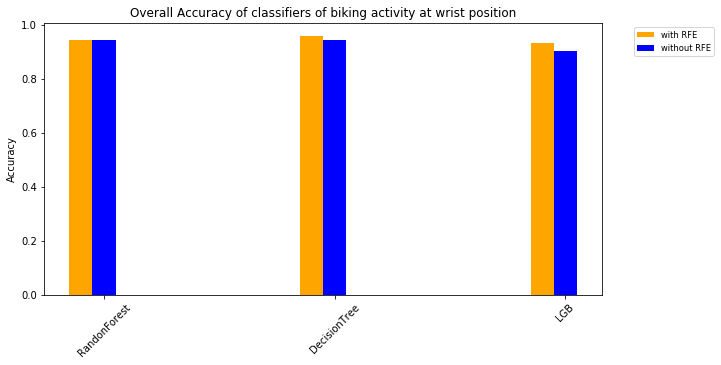

In [79]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np


Out_Accuracy2 = [ar,ad,lgm]
Out_Accuracy3 = [accuracy2,accuracy3,accuracy1]
Model_2 = ['RandonForest','DecisionTree','LGB']

ind =  np.arange(3)   # the x locations for the groupsx
width = 0.1  # the width of the bars


fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(ind, Out_Accuracy2, width, color='orange',label ='with RFE')
rects2 = ax.bar(ind + width ,Out_Accuracy3, width, color='b',label = 'without RFE')

ax.set_ylabel('Accuracy')
ax.set_title('Overall Accuracy of classifiers of biking activity at wrist position')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_2,rotation=45)
plt.legend(handles=[rects1, rects2], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()